Importing the necessary libraries

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Activation, Dense, Conv2D, MaxPool2D, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix

import itertools
import os
import shutil
import random
import glob
import warnings
import matplotlib.pyplot as plt
warnings.simplefilter(action='ignore', category=FutureWarning)
%matplotlib inline

Mount Google Drive into the Colab runtime. This enables the user to access files stored in their Google Drive and also to save files from Colab to their Google Drive.

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


1) The getcwd() method is used to get the current working directory (CWD) of the Python script. In this case, the script is running in a Google Colab environment, so the method returns the path to the default working directory of the Colab environment.

2) The import os statement is used to import the os module, which provides a way of using operating system dependent functionality like reading or writing to the file system.

3)The commented out os.chdir() line can be used to change the current working directory to a different path within the file system.


In [3]:
import os
# os.chdir("drive/")
os.getcwd()

'/content'

1) These are file paths that specify the location of the training and validation datasets for a computer vision task of classifying images of cats and dogs using a Convolutional Neural Network (CNN).

2) The CNN model can then be trained on the images in the training dataset and validated on the images in the validation dataset to improve its accuracy in classifying images of cats and dogs.

In [4]:
train_path = '/content/drive/MyDrive/cat & dog classification CNN/TRAIN'
valid_path = '/content/drive/MyDrive/cat & dog classification CNN/VALIDATION'

1)This is a Python code statement that imports the ImageDataGenerator class from the tensorflow.keras.preprocessing.image module.

2) The ImageDataGenerator class is a tool provided by the Keras deep learning library to preprocess and augment images in real-time during model training. It is commonly used in computer vision tasks to generate batches of images with various transformations and augmentations such as zooming, flipping, and rotating, which can increase the diversity and size of the training dataset and improve the performance of the model.

In [5]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator


1)For both data generators, the preprocessing_function parameter is set to the preprocess_input() function from the MobileNet model in the tf.keras.applications module. This function applies specific preprocessing steps to the input images before they are fed to the model, such as normalizing the pixel values to be in the range [-1, 1].

2)The flow_from_directory() method of each data generator is then used to specify the directory of the dataset, the target size of the input images (which will be resized to 224x224 pixels), the classes (in this case 'CATS' and 'DOGS'), and the batch size (which is set to 10).

3)The flow_from_directory() method generates batches of augmented images and their corresponding labels from the specified directory, with the specific preprocessing steps applied. These batches can be used to train or validate a CNN model for a cat and dog image classification task.

In [6]:
train_batches = ImageDataGenerator(preprocessing_function = tf.keras.applications.mobilenet.preprocess_input) \
                .flow_from_directory(directory=train_path, target_size=(224, 224), classes=['CATS', 'DOGS'], batch_size=10)

valid_batches = ImageDataGenerator(preprocessing_function = tf.keras.applications.mobilenet.preprocess_input) \
                .flow_from_directory(directory=valid_path, target_size=(224, 224), classes=['CATS', 'DOGS'], batch_size=10)

Found 2181 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


1) These code statements are making assertions about the train_batches and valid_batches objects that were created previously using ImageDataGenerator.flow_from_directory() method.

2)The first assertion assert train_batches.n == 2181 checks that the number of images in the training dataset is equal to 2181. This is done by checking the n attribute of the train_batches object, which represents the total number of images in the directory.

3)The second assertion assert valid_batches.n == 500 checks that the number of images in the validation dataset is equal to 500. This is done by checking the n attribute of the valid_batches object.

4)The third assertion assert train_batches.num_classes == valid_batches.num_classes == 2 checks that the number of classes in both the training and validation datasets is equal to 2. This is done by checking the num_classes attribute of both the train_batches and valid_batches objects, which were set to 2 in the flow_from_directory() method. Since this is a binary classification task (cats or dogs), there are two classes in the dataset.

In [7]:
assert train_batches.n == 2181
assert valid_batches.n == 500


assert train_batches.num_classes == valid_batches.num_classes == 2

1)This code is using the next() function to retrieve the next batch of images and their corresponding labels from the train_batches object.

2)The train_batches object was created using the ImageDataGenerator.flow_from_directory() method and generates batches of augmented images and their corresponding labels from the specified directory.

3)By calling the next() function on the train_batches object, the code is requesting the next batch of images and labels that the generator will generate. These images and labels will be returned in the form of a tuple, with imgs representing the batch of images and labels representing their corresponding labels.

4)This technique is often used during the training of a deep learning model, where batches of images are fed to the model during each iteration of the training loop, allowing the model to learn from the dataset in a more efficient manner.

In [8]:
imgs, labels = next(train_batches)

This code defines a function called plotImages that takes in an array of images images_arr as input and plots a row of 10 images in a grid using Matplotlib.

The function starts by creating a figure object and 10 subplots with a 20 by 20 figure size, using the subplots() function from Matplotlib.

It then flattens the axes array into a 1D array using the flatten() function, allowing it to iterate over the array of images.

For each image in the input array images_arr, the function uses the imshow() function of Matplotlib to display the image in the corresponding subplot, and turns off the axis using the axis('off') function to remove the tick marks and labels.

Finally, the function uses tight_layout() function to adjust the spacing between subplots, and show() function to display the entire figure with the images.

This function can be used to visualize a row of 10 images from a batch generated by the ImageDataGenerator object, for example, to inspect the augmentation and preprocessing that was applied to the images before feeding them into the model.

In [9]:
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 10, figsize=(20, 20))
    axes = axes.flatten()
    
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

This code is calling the plotImages() function with the imgs variable as input, which is a batch of 10 preprocessed and augmented images generated by the train_batches object.

Since the train_batches object was created with the preprocessing_function argument set to tf.keras.applications.mobilenet.preprocess_input, the images in the batch have undergone a preprocessing step that is specific to the MobileNet architecture. This step involves scaling the pixel values of the image between -1 and 1, which helps to improve the convergence and stability of the training process.

The colors of the images may appear distorted when plotted because the preprocessing step involves subtracting the mean RGB values of the MobileNet dataset from the images, which can shift the colors of the image. However, this distortion will not affect the performance of the model, as the training process should be able to learn the features of the images regardless of their color values.

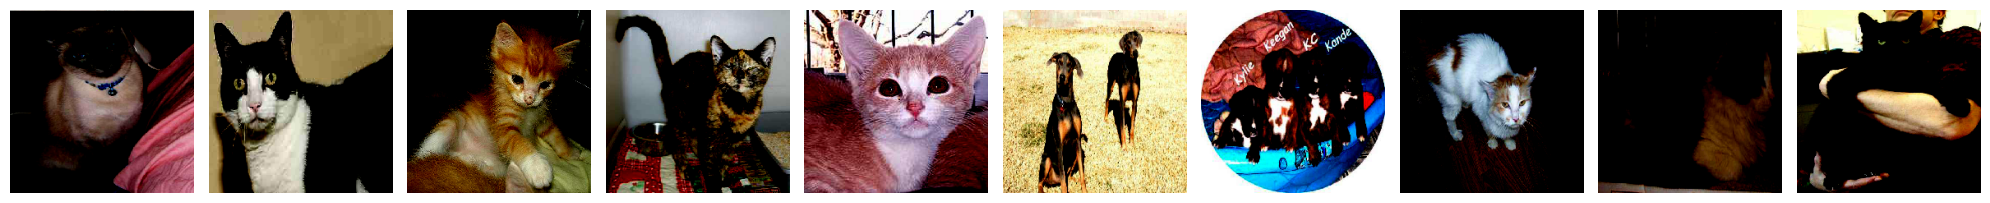

In [10]:
plotImages(imgs)
# the images have their colors distorted as they have been preprocessed 
# so that they can be used for more smooth training.

This code is simply printing the labels variable to the console, which contains the ground truth labels corresponding to the images in the imgs batch generated by the train_batches object.

The labels variable is a NumPy array of shape (batch_size, num_classes), where batch_size is the number of images in the batch (in this case, 10), and num_classes is the number of classes that the images can be classified into (in this case, 2 for cats and dogs). Each row in the labels array represents the ground truth label vector for an image in the batch, where the value of the element in the i-th column indicates whether the image belongs to the i-th class or not.

Printing the labels variable allows us to inspect the ground truth labels of the images in the batch, which can be useful for verifying that the images are being labeled correctly, or for debugging the training process.

In [11]:
print(labels)

[[1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]]


This code defines a simple convolutional neural network (CNN) architecture for image classification, using the Keras Sequential API.

The Sequential object is initialized with a list of layers, which are defined using the Keras Conv2D, MaxPool2D, Flatten, and Dense classes.

The first layer is a Conv2D layer with 32 filters, a kernel size of 3x3, 'relu' activation function, and 'same' padding. The input shape of the layer is (224,224,3), corresponding to the size and channel dimension of the input images.
The second layer is a MaxPool2D layer with a pool size of 2x2 and stride of 2, which reduces the spatial size of the feature maps by a factor of 2.
The third layer is a Conv2D layer with 64 filters, a kernel size of 3x3, 'relu' activation function, and 'same' padding.
The fourth layer is another MaxPool2D layer with the same pool size and stride as before.
The fifth layer is a Flatten layer, which flattens the 2D feature maps into a 1D feature vector.
The final layer is a Dense layer with 2 units (one for each class), 'softmax' activation function, and no bias. This layer performs the final classification of the input image into one of the two classes.
This architecture is relatively simple compared to more complex CNNs, but it should be sufficient for the binary classification task of distinguishing between cats and dogs.

In [12]:
model_own = Sequential([
    Conv2D(filters=32, kernel_size=(3,3), activation='relu', padding='same', input_shape=(224,224,3)), # 3 is for rgb color configuration
    MaxPool2D(pool_size=(2,2), strides=2),
    Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding='same'),
    MaxPool2D(pool_size=(2,2), strides=2),
    Flatten(),
    Dense(units=2, activation='softmax'), # since ther are only two classes cats and dogs.
])


This code compiles the previously defined model_own using the compile method with the following arguments:

optimizer=Adam(learning_rate=0.0001): This specifies the optimization algorithm to be used during training, which in this case is the Adam optimizer with a learning rate of 0.0001.
loss='categorical_crossentropy': This specifies the loss function to be used during training, which in this case is the categorical cross-entropy loss. Since there are only two classes (cats and dogs), we could also use binary cross-entropy loss, which is equivalent to categorical cross-entropy with two classes.
metrics=['accuracy']: This specifies the evaluation metric to be used during training and testing, which in this case is the accuracy metric.
Compiling the model sets it up for training by configuring the optimizer, loss function, and evaluation metric. This step is necessary before calling the fit method to train the model on the training data.

In [13]:
model_own.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])
# if the above code gives error, then you can use binary_crossentropy.


This code trains the previously defined model_own using the fit method with the following arguments:

x=train_batches: This specifies the input data for training, which in this case is the train_batches generator object.
validation_data=valid_batches: This specifies the validation data to use during training, which in this case is the valid_batches generator object.
epochs=20: This specifies the number of training epochs to run, which is set to 20 in this case.
verbose=2: This specifies the verbosity mode during training, which is set to 2 in this case. A value of 2 means that progress updates will be printed to the console at the end of each epoch.
During training, the model will use the specified optimization algorithm, loss function, and evaluation metric to update its weights and biases in order to minimize the loss and improve its accuracy on the training data. At the end of each epoch, the model will evaluate its performance on the validation data and print the evaluation results to the console. After all epochs have completed, the final model weights will be saved and can be used for making predictions on new data.

In [14]:
model_own.fit(x=train_batches, validation_data=valid_batches, epochs=20, verbose=2)


Epoch 1/20
219/219 - 988s - loss: 0.7305 - accuracy: 0.5837 - val_loss: 0.6273 - val_accuracy: 0.6580 - 988s/epoch - 5s/step
Epoch 2/20
219/219 - 13s - loss: 0.5750 - accuracy: 0.6983 - val_loss: 0.5623 - val_accuracy: 0.7540 - 13s/epoch - 60ms/step
Epoch 3/20
219/219 - 13s - loss: 0.4781 - accuracy: 0.7726 - val_loss: 0.8560 - val_accuracy: 0.4280 - 13s/epoch - 60ms/step
Epoch 4/20
219/219 - 13s - loss: 0.3927 - accuracy: 0.8326 - val_loss: 0.5417 - val_accuracy: 0.7420 - 13s/epoch - 60ms/step
Epoch 5/20
219/219 - 13s - loss: 0.3129 - accuracy: 0.8918 - val_loss: 0.3940 - val_accuracy: 0.8480 - 13s/epoch - 59ms/step
Epoch 6/20
219/219 - 13s - loss: 0.2492 - accuracy: 0.9202 - val_loss: 0.6891 - val_accuracy: 0.6460 - 13s/epoch - 60ms/step
Epoch 7/20
219/219 - 14s - loss: 0.1883 - accuracy: 0.9560 - val_loss: 0.6895 - val_accuracy: 0.6560 - 14s/epoch - 62ms/step
Epoch 8/20
219/219 - 13s - loss: 0.1529 - accuracy: 0.9642 - val_loss: 0.8340 - val_accuracy: 0.5760 - 13s/epoch - 59ms/step


This code downloads the MobileNet model, which is a pre-trained convolutional neural network (CNN) architecture that has been trained on a large dataset of images to perform image classification tasks. The tf.keras.applications.mobilenet.MobileNet() function loads the pre-trained MobileNet model from the internet and returns a Keras model object.

MobileNet is a lightweight CNN architecture that is designed to have a small memory footprint and be computationally efficient, making it well-suited for deployment on resource-constrained devices such as mobile phones and embedded systems. The pre-trained MobileNet model can be used as a feature extractor or as a starting point for transfer learning, where the pre-trained weights are fine-tuned on a new dataset of images.

In [15]:
# Download model - Internet connection needed for the first time
mobile_new = tf.keras.applications.mobilenet.MobileNet()

17225924/17225924 [==============================] - 2s 0us/step


This code prints a summary of the mobile_new model architecture to the console. The summary includes information about the input and output shapes of each layer in the model, the number of parameters in each layer, and the total number of parameters in the model.

The summary provides a useful way to quickly understand the structure of the model and to verify that it has been loaded correctly. In addition, it can help with debugging if there are any issues with the model architecture or if the wrong model has been loaded.

In [16]:
mobile_new.summary()

Model: "mobilenet_1.00_224"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 112, 112, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)     288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 112, 112, 32)     128       
 ation)                                         

This code creates a new output layer for the mobile_new model by taking the output from the 6th last layer of the model and passing it through a Dense layer with 2 output units and a softmax activation function.

The mobile_new model is a functional model, which means that its layers are connected to each other in a graph-like structure rather than being stacked sequentially like in a Sequential model. By accessing the output of the 6th last layer of the model (mobile_new.layers[-6].output), we can use the existing layers in the model as feature extractors and add our own output layer for the specific classification task we are interested in.

In this case, we are using the pre-trained MobileNet model as a feature extractor for a binary classification task of distinguishing between cats and dogs. We take the output of the 6th last layer of the model, which represents a high-level feature representation of the input image, and pass it through a new output layer with 2 units, which produces a probability distribution over the two classes (cats and dogs).

In [17]:
# how to choose till when to take in the layer, you have to experiment
x = mobile_new.layers[-6].output
output = Dense(units=2, activation='softmax')(x) # 2 as we have two classes dogs and cats.
# We know that mobilenet and vgg16 both are functional model while we use Sequential model to create
# neural networks. Before we were iterating over all layers from vgg16 to a sequential model
# now we are directly using the model itself.

This code creates a new Keras model (Models) by specifying the input and output layers of the model. The inputs argument is set to the input layer of the pre-trained mobile_new model, while the outputs argument is set to the new output layer we defined in the previous step (output = Dense(units=2, activation='softmax')(x)).

By setting the inputs argument to the input layer of mobile_new, we ensure that the weights of the pre-trained layers in mobile_new are frozen and not updated during training. This is because the feature extractors in the pre-trained layers have already learned useful representations of images that can be used for our classification task, and we don't want to modify them too much.

The Models model takes an input image and passes it through the pre-trained mobile_new model to extract features, and then through our own output layer to produce a probability distribution over the two classes (cats and dogs). We can now compile and train this model on our cat and dog dataset to fine-tune the pre-trained weights and produce a more accurate classifier.

In [18]:
Models = Model(inputs=mobile_new.input, outputs=output)

This code sets the trainable attribute of all layers in the Models model except for the last 23 layers to False. By setting trainable to False, we freeze the weights of these layers during training, meaning that their learned representations will not be updated.

The reason for freezing the weights of some of the layers is to avoid overfitting and to speed up training. When we fine-tune a pre-trained model, we generally only want to update the weights of the last few layers, which are responsible for predicting the specific classes we are interested in. The lower-level layers in the model, which are responsible for detecting low-level features such as edges and corners, have already learned useful representations and don't need to be updated much.

In this case, we are freezing all but the last 23 layers of the Models model, which means that we will only update the weights of these layers during training. The specific number of layers to freeze can be adjusted based on the size of the dataset and the complexity of the classification task.

In [19]:
for layer in Models.layers[:-23]: # there are 88 layers and want to only train the last 23 layers
    layer.trainable = False

This code prints a summary of the Models model, which is a modified version of the pre-trained MobileNet model. The summary shows a list of all layers in the model, along with their output shape and the number of trainable parameters in each layer.

The summary starts with an input layer, which takes as input images of size (224, 224, 3), where 3 is the number of color channels. The summary then shows a series of layers that apply a series of convolutions, pooling operations, and nonlinear activations to the input image, gradually reducing its spatial dimensions and increasing the number of feature maps.

Towards the end of the summary, we can see the last few layers of the model that were added specifically for the cat and dog classification task. These include a global average pooling layer, which averages the values of each feature map over its entire spatial extent, and a dense output layer with two units and a softmax activation function, which produces a probability distribution over the two classes (cat and dog).

We can also see that all but the last 23 layers in the model have trainable set to False, meaning that their weights will not be updated during training.

In [20]:
Models.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 112, 112, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)     288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 112, 112, 32)     128       
 ation)                                                      

This code defines a sequential neural network with an input layer of 5 neurons and a hidden layer of 10 neurons with the ReLU activation function. The output layer has one neuron with a sigmoid activation function, which is suitable for binary classification problems. The optimizer used is Adam, with a learning rate of 0.0001. The model.compile() method sets the loss function to binary cross-entropy and the metrics to accuracy.






In [21]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

model = Sequential()
model.add(Dense(10, input_shape=(5,), activation='relu'))
model.add(Dense(1, activation='sigmoid'))

optimizer = Adam(learning_rate=0.0001)

model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])


This line of code is compiling the model after setting its optimizer, loss function, and evaluation metrics.

The optimizer parameter specifies the optimization algorithm to use during the training process. Here, the Adam optimizer is used with a learning rate of 0.0001.

The loss parameter specifies the loss function to use during the training process. Here, the categorical cross-entropy loss function is used.

The metrics parameter specifies the evaluation metric to be used during training and testing. Here, the accuracy metric is used to evaluate the performance of the model.

In [22]:
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])


This line of code is compiling a deep learning model using the Adam optimizer with a learning rate of 0.0001 as the optimizer, categorical_crossentropy as the loss function, and accuracy as the evaluation metric.

The compile method in Keras is used to configure the model for training by specifying the optimizer, loss function, and evaluation metric. After compiling the model, it is ready to be trained using the fit method.

In [26]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

This code is fitting (training) the Models model on the train_batches data and validating it on the valid_batches data. The epochs parameter determines the number of times the model will be trained on the entire training dataset. The verbose parameter determines the amount of output displayed during the training process. Here, verbose=2 means that progress bar will be displayed during training.

In [ ]:
Models.fit(x=train_batches, validation_data=valid_batches, epochs=15, verbose=2)

The code prediction_new = model.predict(x=valid_batches, verbose=0) is making predictions on the validation data using the model that was trained. The predictions are stored in the prediction_new variable, which is a NumPy array.

prediction_new[0] retrieves the first prediction from the array, which corresponds to the prediction for the first image in the validation set.

In [36]:
prediction_new = model.predict(x=valid_batches, verbose=0)
prediction_new[0]

array([0.4109801, 0.3148741, 0.2741458], dtype=float32)

These two lines of code are predicting the class probabilities for the first image in the validation set and the first image in the training set, respectively, using the trained model model. The predict() method takes the input data and returns the output predictions of the model. The argument x is set to either valid_batches or train_batches depending on which set of data you want to make predictions on.

prediction_new will be a 2D numpy array of shape (batch_size, num_classes), where batch_size is the number of images in the specified set and num_classes is the number of classes in the classification problem (in this case, num_classes is 2 since the problem is binary classification of cats and dogs). prediction_new[0] will return the predicted probabilities for the first image in the set.

In [37]:
prediction_new = model.predict(x=train_batches, verbose=0)
prediction_new[0]

array([0.2875235 , 0.28689823, 0.4255782 ], dtype=float32)

Based on the ordering of the values, it seems that the model is predicting that the image is most likely to be a cat, followed by a dog , and least likely to be a bird.

save model to disk or drive
